In [1]:
import numpy as np
import pandas as pd

In [2]:
df_links = pd.read_csv('ml-25m/links.csv')
df_movies = pd.read_csv('ml-25m/movies.csv')
df_ratings = pd.read_csv('ml-25m/ratings.csv')
df_tags = pd.read_csv('ml-25m/tags.csv')
df_genome_scores = pd.read_csv('ml-25m/genome-scores.csv')
df_genome_tags = pd.read_csv('ml-25m/genome-tags.csv')

In [3]:
print('Size of links data ', df_links.shape)
print('Size of movies data ', df_movies.shape)
print('Size of ratings data ', df_ratings.shape)
print('Size of tags data ', df_tags.shape)
print('Size of genome_scores data ', df_genome_scores.shape)
print('Size of genome_tags data ', df_genome_tags.shape)

Size of links data  (62423, 3)
Size of movies data  (62423, 3)
Size of ratings data  (25000095, 4)
Size of tags data  (1093360, 4)
Size of genome_scores data  (15584448, 3)
Size of genome_tags data  (1128, 2)


Predict the rating for a movie

### Preview Data

In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_ratings['rating'].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

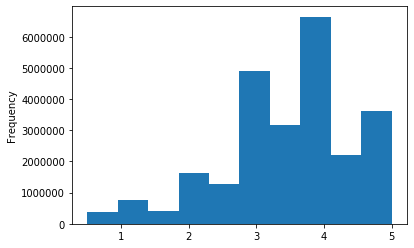

In [7]:
df_ratings['rating'].astype(float).plot.hist()

In [8]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [11]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
df_genome_tags.head(20)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


### Check for Missing Values

In [13]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Missing Values', '% of Total  Values'])

In [14]:
missing_data(df_links)

,Missing Values,% of Total Values
tmdbId,107,0.171411
imdbId,0,0.000000
movieId,0,0.000000


In [15]:
df_links_null_data = df_links[df_links.isnull().any(axis=1)]
df_links_null_data

,movieId,imdbId,tmdbId
706,721,114103,NaN
715,730,125877,NaN
754,770,38426,NaN
775,791,113610,NaN
1080,1107,102336,NaN
...,...,...,...
60459,203368,7952000,NaN
60681,203881,10575038,NaN
61576,206282,8773020,NaN
62339,208799,4035866,NaN


In [16]:
missing_data(df_movies)

,Missing Values,% of Total Values
genres,0,0.0
title,0,0.0
movieId,0,0.0


In [17]:
missing_data(df_ratings)

,Missing Values,% of Total Values
timestamp,0,0.0
rating,0,0.0
movieId,0,0.0
userId,0,0.0


In [18]:
missing_data(df_tags)

,Missing Values,% of Total Values
tag,16,0.001463
timestamp,0,0.000000
movieId,0,0.000000
userId,0,0.000000


In [19]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [20]:
df_tags_null_data = df_tags[df_tags.isnull().any(axis=1)]
df_tags_null_data

,userId,movieId,tag,timestamp
860902,121710,33826,NaN,1221450908
976395,141727,123,NaN,1199450867
976396,141727,346,NaN,1199451946
976400,141727,1184,NaN,1199452261
976407,141727,1785,NaN,1199452006
976408,141727,2194,NaN,1199450677
976410,141727,2691,NaN,1199451002
976418,141727,4103,NaN,1199451920
976420,141727,4473,NaN,1199451040
976422,141727,4616,NaN,1199452441


Most of the untagged rows come from the same user.

In [21]:
# select rows where userId = 141727
df_ratings.loc[df_ratings['userId']==141727]

,userId,movieId,rating,timestamp
21799648,141727,1,3.0,1182084157
21799649,141727,16,4.0,1150304533
21799650,141727,25,4.5,1197743889
21799651,141727,32,4.0,1155834353
21799652,141727,36,4.5,1182084280
...,...,...,...,...
21800006,141727,105844,4.0,1438714926
21800007,141727,106100,5.0,1438714942
21800008,141727,106782,2.5,1400315154
21800009,141727,106920,4.0,1400315105


User 141727 has rated 363 movies and failed to tag 15 of those films

In [22]:
# Drop rows in df_tags with missing data
df_tags.dropna(subset=['tag'], inplace=True)

In [23]:
# double-check df_tags for missing data
missing_data(df_tags)

,Missing Values,% of Total Values
timestamp,0,0.0
tag,0,0.0
movieId,0,0.0
userId,0,0.0


In [24]:
missing_data(df_genome_scores)

,Missing Values,% of Total Values
relevance,0,0.0
tagId,0,0.0
movieId,0,0.0


In [25]:
missing_data(df_genome_tags)

,Missing Values,% of Total Values
tag,0,0.0
tagId,0,0.0


### Merge dataframes

In [26]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [27]:
df_ratings_mean = df_ratings.groupby('movieId').mean()[['rating']]
df_ratings_mean

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434
...,...
209157,1.500000
209159,3.000000
209163,4.500000


In [28]:
df_ratings_mean.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [29]:
df_ratings_mean.shape


(59047, 1)

In [30]:
df_movies.shape

(62423, 3)

In [31]:
df_merged = pd.merge(df_movies, df_ratings_mean, on='movieId', how='outer')
df_merged.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434


In [32]:
df_merged = df_merged.rename(columns = {"rating":"mean_rating"}) 
df_merged.head() 

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434


In [33]:
missing_data(df_merged)

,Missing Values,% of Total Values
mean_rating,3376,5.408263
genres,0,0.000000
title,0,0.000000
movieId,0,0.000000


In [34]:
df_merged_null_data = df_merged[df_merged.isnull().any(axis=1)]
df_merged_null_data

,movieId,title,genres,mean_rating
8371,25817,Break of Hearts (1935),Drama|Romance,NaN
8763,26361,Baby Blue Marine (1976),Drama,NaN
11556,52696,"Thousand and One Nights, A (1001 Nights) (1945)",Adventure,NaN
11997,56513,Suicide Killers (2006),Documentary,NaN
12173,58209,Alex in Wonder (Sex and a Girl) (2001),Comedy|Drama,NaN
...,...,...,...,...
62238,208411,Eternal Blood (2002),Action|Horror|Thriller,NaN
62239,208413,Big Business (1929),Comedy,NaN
62240,208415,The Student of Prague (1926),Horror,NaN
62298,208655,The Coldest Game (2019),(no genres listed),NaN


In [35]:
# Drop rows in df_tags with missing data
df_merged.dropna(subset=['mean_rating'], inplace=True)

In [36]:
missing_data(df_merged)

,Missing Values,% of Total Values
mean_rating,0,0.0
genres,0,0.0
title,0,0.0
movieId,0,0.0


In [37]:
df_merged.shape

(59047, 4)

In [38]:
df_tags.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


### One-hot encode categorical variable 'tag'

In [39]:
df_tags['tag'].nunique()

73050

One-hot encoding the tags will result in the creation of 73,050 new features.

In [40]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# top 25 tags
df_tags.groupby('tag').count()[['movieId']].sort_values(by='movieId', ascending=False).head(100)


,movieId
tag,
sci-fi,8330
atmospheric,6516
action,5907
comedy,5702
surreal,5326
based on a book,5079
twist ending,4820
funny,4738
visually appealing,4526


In [41]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [42]:
df_tags.drop(['userId', 'timestamp'], axis=1, inplace=True)

## This is as far as I got. Kernel dies when I try to create dummy variables.


In [ ]:
# Note: Kernel dies when I try to run this cell.

# create dummy variables for tags
df_tags = pd.get_dummies(df_tags)

In [ ]:
df_tags.head()

In [ ]:
df_merged.info()

In [ ]:
# drop unecessary columns
df_merged.drop(['title', 'genres'], axis=1, inplace=True)

In [ ]:
# Merge dummy variables dataframe with mean_rating dataframe

In [ ]:
# create Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Try LightGBM

LightGBM can handle categorical variables and does not need to have dummy variables.